In [2]:
#loading the Dataset and sampling it to get it ready to use in a model

%matplotlib inline
import numpy as np # linear algebra
from os.path  import join
from Data.reading import *
import os
#
# Set file paths based on added MNIST Datasets
#
input_path = 'model_LeNET5/Data/input'
training_images_filepath = join(input_path, '/train-images-idx3-ubyte/train-images-idx3-ubyte')
training_labels_filepath = join(input_path, '/train-labels-idx1-ubyte/train-labels-idx1-ubyte')
test_images_filepath = join(input_path, '/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte')
test_labels_filepath = join(input_path, '/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte')

#
# Load MINST dataset
#
os.chdir('Data')

mnist_dataloader = MnistDataloader(training_images_filepath, training_labels_filepath, test_images_filepath, test_labels_filepath)
(x_train, y_train), (x_test, y_test) = mnist_dataloader.load_data()

In [3]:
#sampling some of the pictures to use in the model
X_train, Y_train, X_test, Y_test = mnist_dataloader.sampling(15000, 500, x_train, y_train, x_test, y_test)

In [4]:
# checking what the data looks like
print("Test:", np.array(X_test).shape, np.array(Y_test).shape)

Test: (500, 28, 28) (500,)


In [5]:
#libraries that will be used to make/run the model and evaluate de results
import keras
from keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix

In [6]:
# Organising and structuing the data for the model
# We add a fourth dimmension.
X_train =  np.array(X_train).reshape((15000, 28, 28, 1))
X_test = np.array(X_test).reshape((500, 28, 28, 1))

# Normalization the images
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# One Hot Encoding using "to_categorical" from keras for the categories 
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

print("Train:", X_train.shape, Y_train.shape)
print("Test:", X_test.shape, Y_test.shape)

Train: (15000, 28, 28, 1) (15000, 10)
Test: (500, 28, 28, 1) (500, 10)


In [7]:
# Initializing LeNet5 model

model = Sequential()
# Entry layer (Convolution)
model.add(Conv2D(filters = 6, 
                 kernel_size = (5, 5),
                 #strides=(1, 1),
                 activation = "relu", 
                 input_shape = (28, 28, 1))) # La capa de convolución siempre lleva relu
# Pooling
model.add(MaxPooling2D(pool_size = (2, 2)))
# Convolution
model.add(Conv2D(filters = 16, 
                 kernel_size = (5, 5), 
                 activation = "relu"))
# Pooling
model.add(AveragePooling2D(pool_size = (2, 2)))

# Flatten (we flatten to continue with the neural network)
model.add(Flatten())
# hidden layers
model.add(Dense(256, activation = "relu"))
model.add(Dense(128, activation = "relu"))
# Exit layers (finishing with softmax activation)
model.add(Dense(len(Y_train[0]), activation = "softmax"))
# Summary
model.summary()

C:\Users\malvarez\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 102,550 (400.59 KB)

 Trainable params: 102,550 (400.59 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
# Compiling the model
model.compile(loss      = "categorical_crossentropy",
              optimizer = "adam",
              metrics   = ["AUC"])
# Fitting the model
history = model.fit(x = X_train, y = Y_train,
          validation_data = (X_test, Y_test),
          epochs = 3)

Epoch 1/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - AUC: 0.9539 - loss: 0.7796 - val_AUC: 0.9956 - val_loss: 0.1552
Epoch 2/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.9976 - loss: 0.1429 - val_AUC: 0.9997 - val_loss: 0.0782
Epoch 3/3
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - AUC: 0.9988 - loss: 0.0901 - val_AUC: 0.9985 - val_loss: 0.0894


In [9]:
#evaluating the model to determine accuracy
test_loss, test_auc = model.evaluate(X_test, Y_test)
print("Test accuracy:", test_auc)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - AUC: 0.9988 - loss: 0.0935
Test accuracy: 0.9984977841377258


In [10]:
# Predictions
y_hat = model.predict(X_test)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [11]:
# Reverting the One-Hot Encoding and creating a confusion matrix
y_hat = [np.argmax(i) for i in y_hat]
Y_test = [np.argmax(i) for i in Y_test]
cfm = confusion_matrix(Y_test, y_hat)

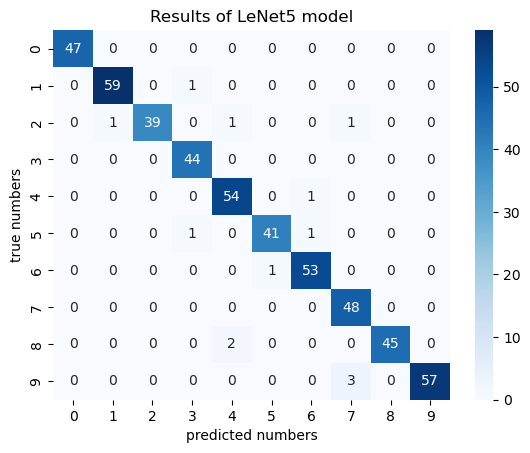

In [12]:
#creating a graph with the results represented in the confusion matrix
import seaborn as sns
m = sns.heatmap(cfm, 
                annot=True,
                #fmt='.1f',
                cmap='Blues',
               )
m.set_xlabel('predicted numbers', fontsize=10)
m.set_ylabel('true numbers', fontsize=10)
m.set_title("Results of LeNet5 model")
os.chdir("..")
plt.savefig("results_Model_LeNet5.png")